# DeepLearning

과학자들은 인간의 뇌와 유사한 인공뇌를 만들기 위해 노력하고 있다. 하지만 현재 기술력으로는 어려운 실정이다. 하지만 뉴런을 대신하는 인위적인 함수와 신경전달물질을 대신하는 숫자값을 다른 함수의 입력으로 넘겨주는 프로그램은 충분히 구현할 수 있다. 이러한 인공적인 신경세포(artificial neuron)를 흉내내는 프로그램을 컴퓨터 과학자들은 퍼셉트론(perceptron)이라고 한다.

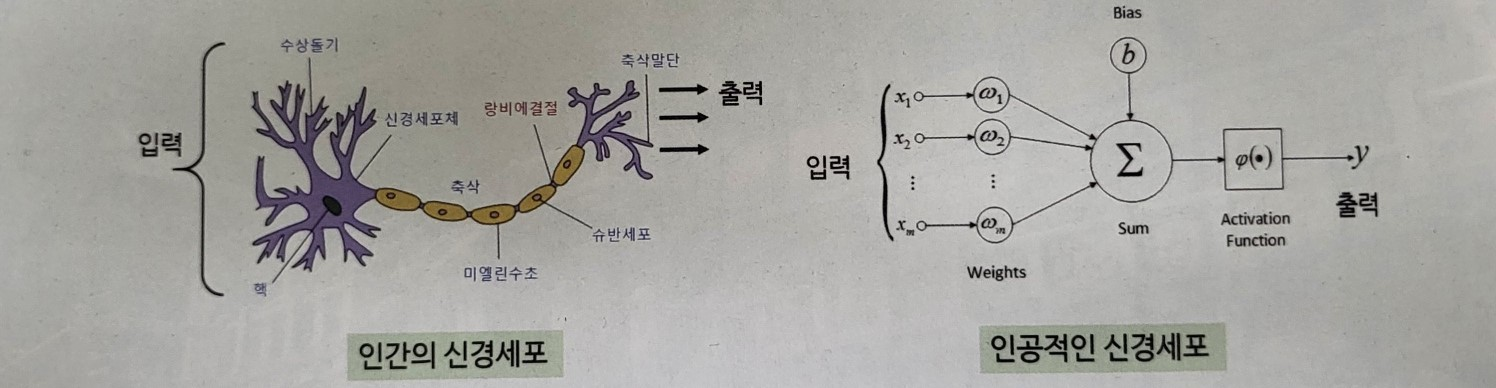

퍼셉트론이 하나의 신경세포를 흉내내는 것이면 인간의 뇌는 입력신호를 바로 출력으로 바꾸지 않고 아래 그림의 왼쪽처럼 입력 신호를 받아 숨겨진 층을 거친 뒤에 출력 신호를 내어 놓을 것이다. 이것을 더욱 복잡하게 만들면 오른쪽의 그림과 같이 많은 층을 거쳐 가는 깊은 신경망이 될 것이다. 이렇게 복잡한 구조를 가지면 더 복잡한 일을 할 수 있지 않을까? 그것이 딥러닝 개념의 시작이다.

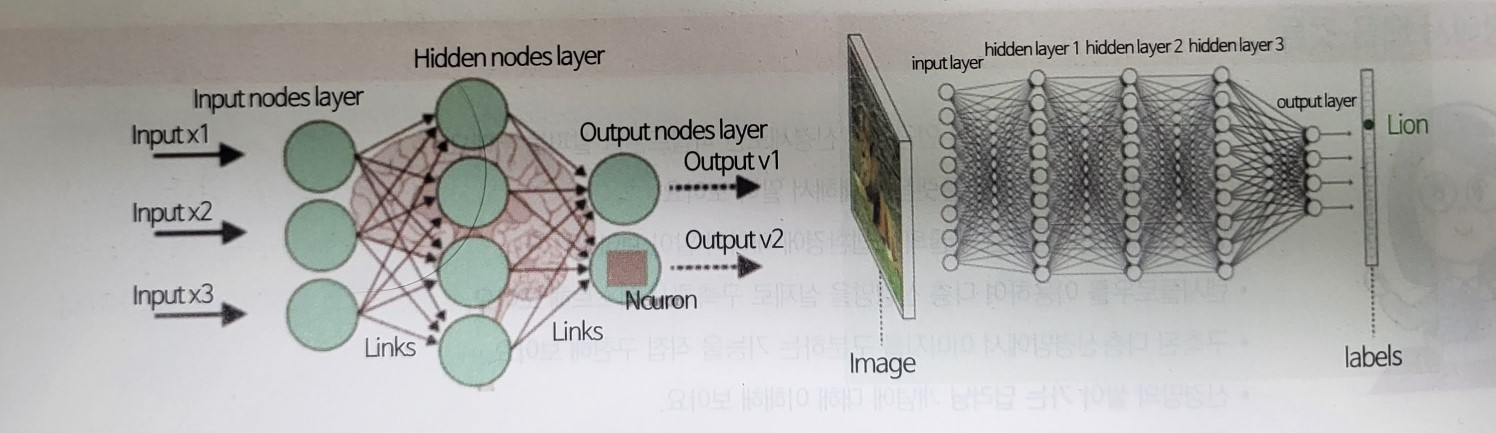

### 가장 단순한 인공 신경망

입력 데이터는 입력 노드에 전달된다. 입력 노드는 출력 노드로 연결되어 있다. 이 신경망 연결을 통해 신호가 전달되는 것이다. 신호의 전달은 입력이 그대로 넘겨지는 것이 아니라 연결강도가 곱해져서 출력 노드로 넘어가게 된다. 출력 노드는 두 개의 기능으로 구분할 수 있다. 먼저 전달되어 오는 신호를 모두 합하는 부분이다. 이렇게 합산된 신호에 따라 다음 계층으로 신호를 보낼 것인지 말 것인지는 활성화 함수에 의해 결정된다. 만약 이 노드가 최종 노드라고 하면 이 결과가 옳은지 답이 되는 레이블과 비교하여 오차를 구할 수 있다.

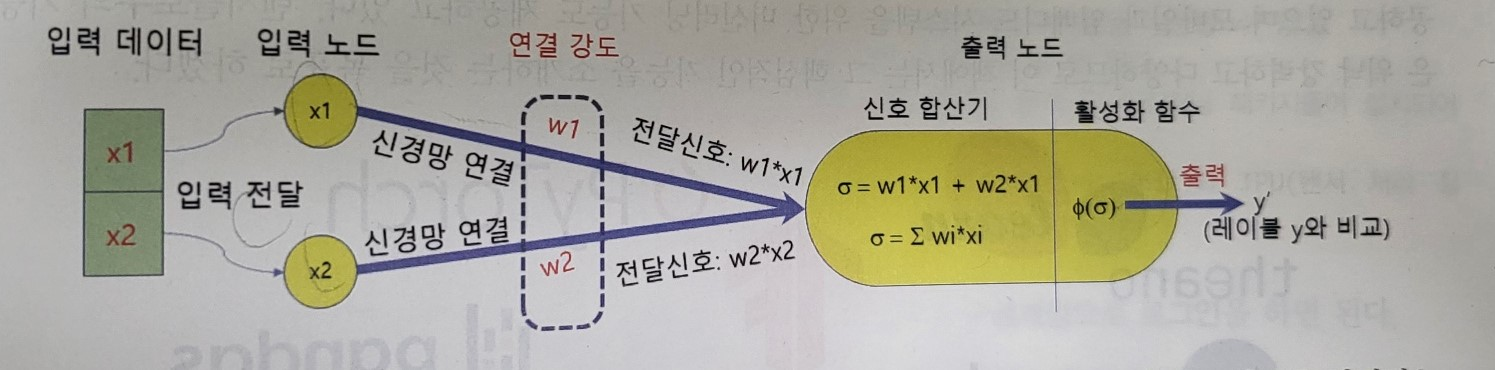

활성화 함수는 출력 노드에 모아진 신호를 다음으로 내어 보낼때 얼마나 강하게 보낼지를 결정하는 함수이다. 가장 단순한 것은 모아진 신호를 그대로 내어 보내는 것이다. 아래 그림의 가장 왼쪽 함수이다. 하지만 실제 생물의 신경 세포는 모아진 신호가 일정한 수준을 넘어야지 다음으로 신호를 내어 보내게 된다. 이러한 동작을 흉내낼 수 있는 가장 단순한 방법은 아래 그림의 왼쪽에서 두번째와 같은 계단 함수가 될 것이다. 하지만 이 함수는 미분이 되지 않는 지점이 존재하여 최적화를 하기가 어렵다. 그래서 전통적으로 많이 사용되던 활성화 함수가 시그모이드 함수였다. 그런데 이 활성화 함수로는 깊은 층을 가진 신경망을 학습시키기가 어렵다는 것이 드러났다. 이후 다양한 활성화 함수들이 사용되었는데, 최근에는 ReLU라고 불리는 정류 선형 유닛 함수가 좋은 결과를 내는 것으로 알려져 있다. 출력이 여러 개가 있을 때에 출력들을 비교하여 출력 노드의 합이 1이 되도록 하는 활성화 함수는 소프트맥스라는 활성화 함수도 있다. 이것은 분류 문제의 최종 출력단에 적합한 활성화 합수이다.

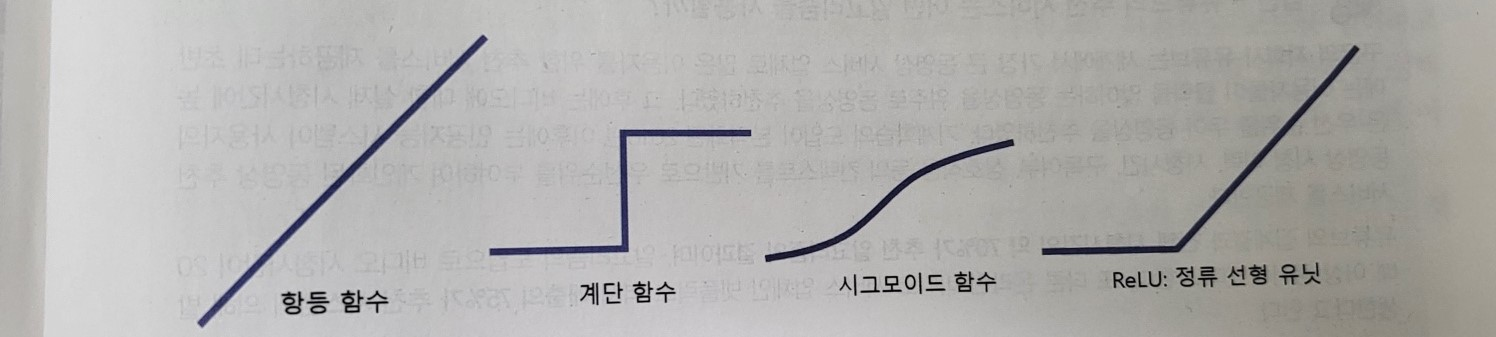

신경망이 동작을 변경하는 방법은 연결강도를 조정하는 것이다. 따라서 인공 신경망의 학습이라는 것은 출력을 목표치와 비교하여 오차를 계산하고 이 오차를 줄이는 방향으로 연결강도를 변경하는 일을 의미한다. 이때 이 연결강도를 모델의 파라미터라고 한다.

이 오차를 줄이는 방향으로 모델의 파라미터를 조정하는 일을 최적화라고 부르는데, 이것이 바로 학습이다. 그리고 이러한 파라미터를 찾기 위한 학습과정을 조절하는 변수들을 하이퍼파라미터라고 한다.

keras에서 제공하는 MNIST 데이터를 이용하여 실습해보자.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 패션 MNIST 데이터는 keras의 데이터셋에 있는데 이를 읽어와서 학습용, 테스트 데이터로 구분
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


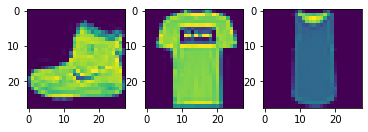

In [2]:
fig = plt.figure()
ax1= fig.add_subplot(1,3,1)
ax2= fig.add_subplot(1,3,2)
ax3= fig.add_subplot(1,3,3)

ax1.imshow(train_images[0])
ax2.imshow(train_images[1])
ax3.imshow(train_images[2])
plt.show()

딥러닝이라는 것은 인공신경망의 층을 깊이 쌓아 학습을 하겠다는 것이다. 이러한 구조를 이해하기 위해 우선 다음과 같은 코드로 몇 개의 신경망 층을 형성해 보자.

### 층을 쌓아보자

In [3]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

계층 구조는 다음과 같다.

3개의 층을 가진 네트워크 모델을 생성한다.

1. Flatten 계층 : 입력은 (28,28)

2. Dense 네트워크 : 출력 128, 활성화 방법 : RELU

3. Dense 네트워크 : 출력 10, 활성화 방법 : SoftMax

1번은 2차원 입력을 1차원으로 변경하는 Flatten이고, 그 다음 두 층은 촘촘한 연결을 하는 Dense 네트워크이다. Flatten 네트워크에는 입력을 그대로 한 줄로 만드는 것이기 때문에 필요한 매개변수는 입력의 크기이다. 이 경우는 28 x 28이다. Dense 네트워크의 입력은 앞 층에서 주어지기 때문에 몇 개의 출력으로 연결할지를 정하는 매개변수가 있다. 그리고 출력 값을 결정하는 함수가 활성화 함수이다. 위의 예에서는 RelU와 SoftMax를 사용하고 있다.

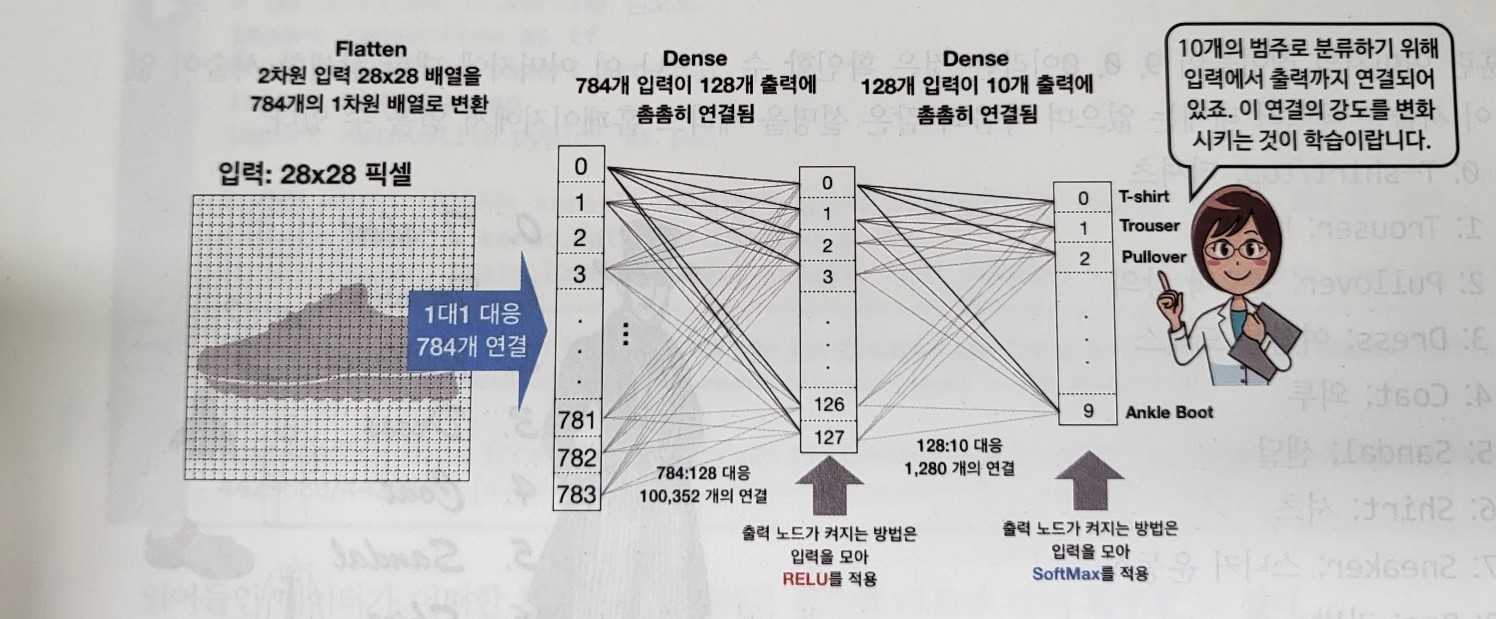

이와 같이 1차원 배열로 변환된 784개의 값은 신경회로망을 통과하여 10개 중 하나의 범주로 분류된다. 이때 숨어있는 학습층을 만드는 명령이 keras.layers.Dense()이다. Dense는 학습을 위한 연결을 밀집된(dense) 구조 혹은 완전 연결 층(Fully connnected)으로 한다는 의미이다.

최종적으로 10개의 카테고리에 입력이 연결되도록 하는 케라스 모델을 keras.Sequential()로 생성하였다.

### 학습 : 최적화와 에폭

앞에서 만든 모델은 아직 데이터를 가지고 학습을 한 상태가 아니다. 신경망의 학습은 기본적으로 추측을 한 뒤에 정답과 비교하여 오차가 얼마인지 확인한 뒤에 이 오차를  줄이는 방법으로 연결의 강도를 조절하는 것이다. 이떼 오차를 측정하는 방법과 이 오차를 줄이는 방법을 지정해야 학습이 이루어질 수 있다. 훈련하기 전에 필요한 설정을 다음과 같이 해보자.

In [4]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

모델을 점점 더 좋은 상태로 만드는 것을 최적화(optimization)라고 부른다. 이를 위해서는 현재 모델이 얼마나 잘못되었는 지를 알아야 한다. 현재 모델의 정답과 실제 정답의 차이가 오차이고, 이 오차를 츨정하는 것이 손실함수이다. 손실함수로 무엇을 사용할 것인지를 지정해야 하는데, 여기서는 sparse_categorical_crossentropht 함수를사용하기로 했다. 그리고 이를 이용하여 모델을 개선하는 최적화 기법으로는 adam을 선택한 것으로 이해하면 된다.

모델이 완성되면 훈련 데이터와 정답 데이터를 주고 학습을 실시하면 된다. 학습을 시작하게 하는 함수의 모델의 fit() 메소드인데, 훈련용 입력과 여기에 대응하는 정답 레이블 데이터 셋을 차례로 주면 된다. 훈련 데이터 모음을 가지고 한 번 훈련을 실시하는 것을 에폭epoch이라고 부르는데, 이것을 반복함으로써 모델은 더 좋은 상태로 바뀌게 된다.

In [5]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 3.1129 - accuracy: 0.6969
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.6565 - accuracy: 0.7678
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5813 - accuracy: 0.7970
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5390 - accuracy: 0.8123
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5220 - accuracy: 0.8202


에폭이 진행되면서 매 에폭 단계에서의 손실값 loss와 정확도 accuracy가 화면에 출력된다. 이 값은 변화를 자세하게 살펴보면 훈련이 진행됨에 따라 예측의 부정확도를 파악할 수 있는 손실값 loss는 감소하고, 예측의 정확성 accuracy 값은 증가함을 확인할 수 있다.

준비된 테스트 데이터를 이용하여 이 모델이 정답 레이블을 잘 맞히는 지 확인해 보자. 테스트 데이터를 적용한 결과는 훈련용 데이터로 훈련한 최종 결과에 비해 정확도가 조금 떨어질 수가 있다.

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.5852 - accuracy: 0.8025 - 593ms/epoch - 2ms/step


### 학습된 신경망을 새 이미지에 적용해 보자

학습을 진행하는 이유는 이렇게 해서 얻은 모델을 새로운 데이터에 적용하기 위해서이다. 앞에서 훈련시킨 모델을 사용해 어떤 이미지든 분류해 보고 싶다. 이제 이 작업을 수행해 보자.

우선 대상이 될만한 데이터를 확보해야 한다. 가장 간단한 것은 이미 가지고 있는 test_images 배열에 있는 이미지들이다. 이 데이터의 형태를 출력해 보면 다음과 같이 (10000, 28, 28)로 나타나는데, 이것은 28x28 크기의 이미지 10000개를 가진 3차원 배열이라는 의미이다.

In [7]:
test_images.shape

(10000, 28, 28)

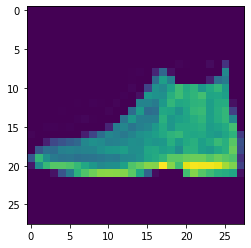

In [9]:
plt.imshow(test_images[0])

이 중에 하나의 데이터를 무작위로 선택해 보자. 무작위로 임의의 데이터를 선택하기 위해서는 넘파이의 random을 이용하면 될 것이다. randint() 함수로 임의의 인덱스를 만들어 해당 위치의 이미지를 가져와 화면에 그려보자.

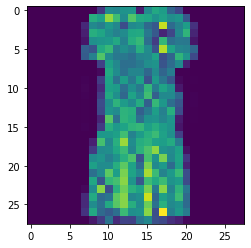

In [14]:
import numpy as np
randIdx = np.random.randint(0, 10000)
plt.imshow(test_images[randIdx])

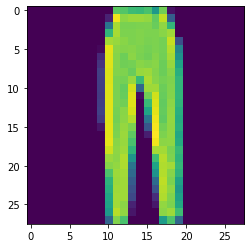

In [15]:
import numpy as np
randIdx = np.random.randint(0, 10000)
plt.imshow(test_images[randIdx])

이 데이터를 모델에 집어 넣어 결과를 얻는 것은 predict() 함수이다. 그런데 다음과 같이 예측을 하면 오류가 발생할 것이다.

In [17]:
ypants = model.predict(test_images[randIdx])

ValueError: ignored

에러 메세지의 내용은 다음과 같다. 우리는 이전에 28x28 크기 이미지가 여러 개 담길 수 있는 (none, 28, 28) 구조의 3차원 배열 입력을 처리하는 모델을 만들었는데, 여기는 2차원 배열만 왔다는 것이다. test_images[randIdx]의 형태는 (28,28)이고 이것은 28개 1차원 배열을 입력 데이터로 하고, 이  입력 데이터가 28개 제공된 것으로 해석하는 것이다.(즉, 모델에서 사용하는 차원과 일치하지 않는 것이다). 넘파이에서 축을 하나 추가하는 newaxis를 다룬 적이 있다. 이것을 이용하여 이 데이터를 (1,28,28)로 만들면 제대로 된 3차원 데이터가 될 것이다. 이 데이터를 입력값으로 predict() 함수에 넣으면, 각각의 레이블과 일치하는 정도를 출력하는데 값이 제일 큰 값이 레이블이 된다.

In [18]:
test_images[randIdx].shape

(28, 28)

In [21]:
ypants = model.predict(test_images[randIdx][np.newaxis, :, :])
ypants

1/1 [==============================] - 0s 31ms/step


array([[1.0820587e-09, 9.9990189e-01, 8.9673706e-31, 9.8064986e-05,
        4.7137311e-10, 1.7481435e-27, 2.5918819e-11, 0.0000000e+00,
        4.6793375e-08, 0.0000000e+00]], dtype=float32)

10개 노드 중에서 1번이 제일 점수가 높다. 이 클래스는 바지로 잘 예측한 것으로 보여진다.

### 클래스를 찾아 출력하게 만들기

앞세 모델을 사용할 때는 모델이 출력하는 최종 결고를 그대로 보여주었다. 그런데, 우리가 관심이 있는 것은 가장 큰 확률을 가진 클래스이다. 이렇게 최종 출력을 통해 가장 일치도가 높은 클래스를 찾아내기 위해 넘파이의 argmax() 함수를 쓸 수 있다. 이것은 배열에서 가장 큰 값을 갖는 인덱스를 반환한다.

In [36]:
ypants = np.argmax(model.predict(test_images[randIdx][np.newaxis, :, :]))
ypants

1/1 [==============================] - 0s 16ms/step


1

클래스의 이름을 리스트로 만들어 놓으면 쉽게 알아볼 수 있도록 출력할 수 있을 것이다.

In [37]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

그러면 다음과 같이 예측 결과를 숫자가 아니라 우리가 부여한 클래스 이름으로 바꾸어 출력할 수 있다.

In [40]:
ypants = np.argmax(model.predict(test_images[randIdx][np.newaxis, :, :]))
print(class_names[ypants])

1/1 [==============================] - 0s 43ms/step
Trouser


최적화 기법은 입력이 들어올 때마다 출력과 목표값의 차이를 보고 신경망의 연결 강도를 조정한다. 이렇게 조정을 하는 과정을 학습이라고 한다. 앞에서 한 작업은 학습이 끝난 모델에 특정 이미지 입력을 제공한 것이다. 그리고 이 이미지의 신호는 연결망을 따라 계산되어 가장 오른쪽에 있는 노드들 10개 가운데 바지를 의미하는 1번 노드를 활성화시키게 된 것이다.

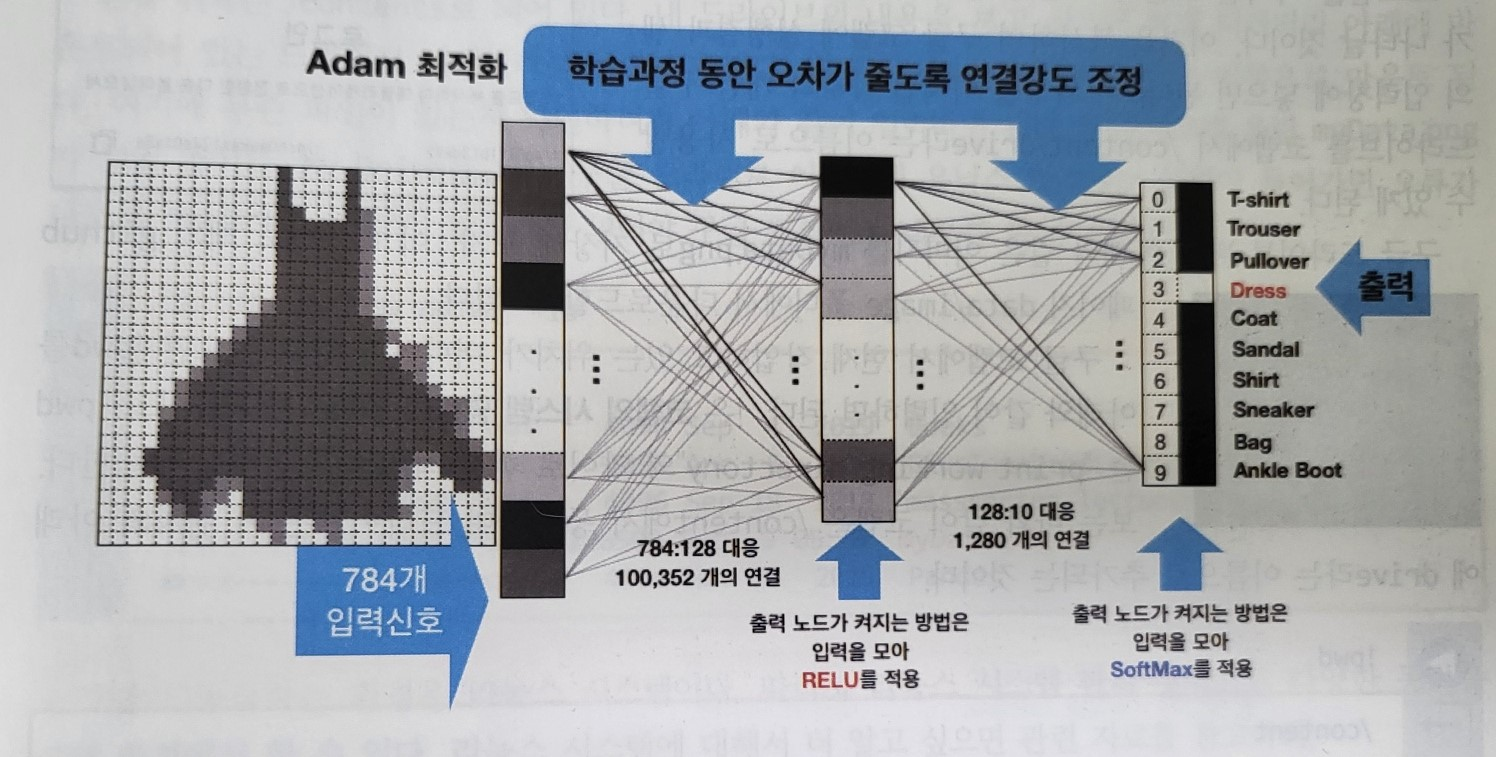

학습을 더 잘 시키기 위해서 층을 더 쌓아보자.

In [45]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

model2.compile(optimizer ='adam',
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])
model2.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 1.4659 - accuracy: 0.6351
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7545 - accuracy: 0.7097
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6276 - accuracy: 0.7476
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5351 - accuracy: 0.8037
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4739 - accuracy: 0.8352


In [46]:
test_loss, test_acc = model2.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.4976 - accuracy: 0.8353 - 607ms/epoch - 2ms/step


시간이 더 걸리긴 했지만, 정확도는 높아진 것을 확인할 수 있다.

혼동행렬을 이용하여 성능이 얼마나 높아졌는 지 확인해 보자.

### 혼동행렬

기계 학습 분야의 통계적 분류 같은 문제에서 컨퓨전 행렬이란 지도 학습으로 훈련된 분류 알고리즘의 성능을 시각화 할 수 있는 표이다.

우선 두 모델 model, model2를 이용하여 검증용 이미지들의 신경망 통과후 출력을 생성해 보자.

In [47]:
pred_1 = model.predict(test_images)
pred_2 = model.predict(test_images)
pred_1, pred_2

313/313 [==============================] - 1s 2ms/step


(array([[1.6013152e-07, 7.2607823e-11, 1.1921254e-12, ..., 1.0440609e-01,
         3.8830683e-07, 7.5852627e-01],
        [2.2345321e-05, 1.7308075e-13, 9.4539434e-01, ..., 0.0000000e+00,
         3.5175516e-09, 0.0000000e+00],
        [5.8919987e-12, 9.9999601e-01, 0.0000000e+00, ..., 0.0000000e+00,
         4.5073317e-10, 0.0000000e+00],
        ...,
        [8.9970662e-08, 1.1249659e-35, 2.1462805e-07, ..., 6.0788436e-34,
         9.9999934e-01, 7.9176015e-28],
        [9.8147890e-10, 9.9920481e-01, 8.2359671e-30, ..., 0.0000000e+00,
         1.4247040e-07, 0.0000000e+00],
        [9.4204791e-02, 2.3170387e-02, 8.2037084e-02, ..., 1.1726384e-01,
         1.5253372e-01, 4.3637436e-02]], dtype=float32),
 array([[1.6013152e-07, 7.2607823e-11, 1.1921254e-12, ..., 1.0440609e-01,
         3.8830683e-07, 7.5852627e-01],
        [2.2345321e-05, 1.7308075e-13, 9.4539434e-01, ..., 0.0000000e+00,
         3.5175516e-09, 0.0000000e+00],
        [5.8919987e-12, 9.9999601e-01, 0.0000000e+00, ...,

이것을 클래스 번호를 나타내는 레이블로 바꾸기 위해서 넘파이의 argmax() 함수를 사용하면 된다. 이때 각 행별로 작업을 진행할 때는 axis = 1의 키워드 매개변수 지정을 하면 된다.

In [48]:
test_images.shape

(10000, 28, 28)

In [51]:
y_hat1 = np.argmax(pred_1, axis = 1)
y_hat2 = np.argmax(pred_2, axis = 1)
y_hat1, y_hat2

(array([9, 2, 1, ..., 8, 1, 5]), array([9, 2, 1, ..., 8, 1, 5]))

이제 사이킷런의 confusion_matrix()를 이용하여 각각의 모델이 생성한 레이블과 정답 레이블 test_labels를 비교하여 시각화해 보자.

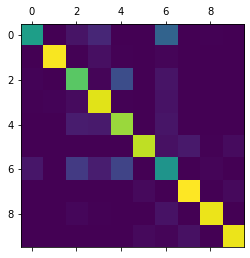

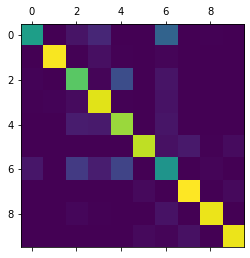

In [53]:
from sklearn.metrics import confusion_matrix
conf_mat1 = confusion_matrix(test_labels, y_hat1)
conf_mat2 = confusion_matrix(test_labels, y_hat2)
plt.matshow(conf_mat1)
plt.matshow(conf_mat2)

층을 더 쌓아 학습을 시켰을 때에 눈에 띄는 변화는 클래스 2의 인식을 제대로 하는 경우가 대폭 늘어난 것이다. 또 클래스 6을 나타내는 열을 살펴보면, 새로운 모델에서는 클래스 6에 속하지 않는 이미지를 6으로 잘못 분류한 경우가 줄었다. 층을 쌓음으로써 모델의 학습이 더 잘 된 것을 확인할 수 있다.

### 은닉층을 쌓기만 하면 좋은 모델이 될까

딥러닝을 위해서는 은닉층을 쌓아 심층 신경망을 만들어 학습에 적용하면 된다고 앞에서 간략하게 설명했다. 그러나 이러한 시도는 여러 가지 좌절을 겪게 된다. 층을 쌓아나감으로써 단순한 모델에 비해 더 좋은 학습 능력을 갖추기도 했지만, 동시에 여러 문제가 발생하게 된다.

대표적인 문제는 모델이 복잡해서 계산 시간이 많이 소요된다는 것이다. 그리고 더 중요한 문제는 단순한 구조로 층만 깊이 쌓을 경우 출력 부분의 잘못에 근거한 학습의 내용이 입력에 가까운 네트워크  층까지 전파가 잘 되지 않는다는 것이다. 따라서 층이 깊어질수록 입력에 따라 다른 동작을 내도록 조정하기 어려워진다는  문제도 발견되었다. 이것은 층을 높여 쌓을수록 학습이 제대로 되지 않는다는 것이다. 이러한 이유로 심층 구조는 학습이 이루어진다 해도 과적합이 되는 특성을 갖는다.
